# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [6]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

load_dotenv()
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/christiancampbell/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
# Read your api key environment variable
api_key = os.getenv("NEWSAPI_KEY")

In [8]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [9]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(q="bitcoin", language="en", page_size=100, sort_by="relevancy")

print(f"Total articles about Bitcoin {btc_news['totalResults']}")

btc_news["articles"][0]

Total articles about Bitcoin 4726


{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Timothy B. Lee, Ars Technica',
 'title': 'An Engineer Gets 9 Years for Stealing $10M From Microsoft',
 'description': 'The defendant tried—and failed—to use bitcoin to cover his tracks.',
 'url': 'https://www.wired.com/story/an-engineer-gets-9-years-for-stealing-dollar10m-from-microsoft/',
 'urlToImage': 'https://media.wired.com/photos/5fac6afb446b4639b3d5b8d8/191:100/w_1280,c_limit/Security-Microsoft-1229426260.jpg',
 'publishedAt': '2020-11-12T14:00:00Z',
 'content': "A former Microsoft software engineer from Ukraine has been sentenced to nine years in prison for stealing more than $10 million in store credit from Microsoft's online store. From 2016 to 2018, Volod… [+3307 chars]"}

In [10]:
# Fetch the Ethereum news articles
etc_news = newsapi.get_everything(q="ethereum", language="en", page_size=100, sort_by="relevancy")

print(f"Total articles about Ethereum {etc_news['totalResults']}")

etc_news["articles"][0]

Total articles about Ethereum 1308


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Karissa Bell',
 'title': 'PayPal now lets all US users buy, sell and hold cryptocurrency',
 'description': 'PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only available to a small subset of PayPal account holders. That’s…',
 'url': 'https://www.engadget.com/paypal-opens-cryptocurrency-all-us-accounts-210541778.html',
 'urlToImage': 'https://o.aolcdn.com/images/dims?resize=1200%2C630&crop=1200%2C630%2C0%2C0&quality=95&image_uri=https%3A%2F%2Fs.yimg.com%2Fos%2Fcreatr-uploaded-images%2F2020-11%2F4e1af080-2528-11eb-bbdf-193e571d142a&client=amp-blogside-v2&signature=22ad23dde6ee3e667a8067a4c39e1962659cec92',
 'publishedAt': '2020-11-12T21:05:41Z',
 'content': 'PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptoc

In [11]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]

        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })

    except AttributeError:
        pass

btc_df = pd.DataFrame(btc_sentiments)

cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()

,date,text,compound,positive,negative,neutral
0,2020-11-12,A former Microsoft software engineer from Ukra...,-0.6705,0.064,0.199,0.737
1,2020-12-03,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.000,0.838
2,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.000,0.947
3,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950
4,2020-12-06,"Unlike ‘conventional’ cryptocurrencies, a cent...",0.0000,0.000,0.000,1.000


In [12]:
# Create the ethereum sentiment scores DataFrame
etc_sentiments = []

for article in etc_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]

        etc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })

    except AttributeError:
        pass

etc_df = pd.DataFrame(etc_sentiments)

cols = ["date", "text", "compound", "positive", "negative", "neutral"]
etc_df = etc_df[cols]

etc_df.head()

,date,text,compound,positive,negative,neutral
0,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.0,0.947
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
2,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
3,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.0,0.912
4,2020-12-07,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.0,0.948


In [13]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,98.000000,98.000000,98.000000,98.000000
mean,0.151223,0.056990,0.020847,0.922173
std,0.338619,0.065976,0.053264,0.083086
min,-0.946800,0.000000,0.000000,0.637000
25%,0.000000,0.000000,0.000000,0.858000
50%,0.000000,0.050000,0.000000,0.948000
75%,0.416600,0.120000,0.000000,1.000000
max,0.877900,0.318000,0.363000,1.000000


In [14]:
# Describe the Ethereum Sentiment
etc_df.describe()

,compound,positive,negative,neutral
count,97.000000,97.000000,97.000000,97.000000
mean,0.237426,0.078505,0.020165,0.901340
std,0.359391,0.079579,0.043562,0.089348
min,-0.670500,0.000000,0.000000,0.653000
25%,0.000000,0.000000,0.000000,0.847000
50%,0.226300,0.074000,0.000000,0.912000
75%,0.510600,0.132000,0.000000,1.000000
max,0.883400,0.347000,0.196000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

In [15]:
#Q1 Answer: Ethereum
#Q2 Answer: Ethereum
#Q3 Answer: Ethereum

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [16]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [17]:
# Expand the default stopwords list if necessary
import nltk
nltk.download('wordnet')
nltk.download('reuters')
nltk.download('stopwords')
nltk.download('punkt')


lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/christiancampbell/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     /Users/christiancampbell/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/christiancampbell/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/christiancampbell/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
# Complete the tokenizer function
def tokenizer(text):
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    sw = set(stopwords.words('english'))
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens


In [19]:
# Create a new tokens column for bitcoin
btc_df["tokens"] = btc_df['text'].apply(tokenizer)
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-11-12,A former Microsoft software engineer from Ukra...,-0.6705,0.064,0.199,0.737,"[former, microsoft, software, engineer, ukrain..."
1,2020-12-03,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.000,0.838,"[visahas, partnered, cryptocurrency, startup, ..."
2,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.000,0.947,"[paypal, bringing, newlyannounced, support, cr..."
3,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950,"[november, absolutely, massive, twomonth, rall..."
4,2020-12-06,"Unlike ‘conventional’ cryptocurrencies, a cent...",0.0000,0.000,0.000,1.000,"[unlike, conventional, cryptocurrencies, centr..."


In [20]:
# Create a new tokens column for ethereum
etc_df["tokens"] = etc_df['text'].apply(tokenizer)
etc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.0,0.947,"[paypal, bringing, newlyannounced, support, cr..."
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[file, photo, representation, ethereum, virtua..."
2,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[file, photo, representation, ethereum, virtua..."
3,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.0,0.912,"[london, reuters, digital, currency, ethereum,..."
4,2020-12-07,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.0,0.948,"[new, york, reuters, institutional, investor, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [21]:
from collections import Counter
from nltk import ngrams

In [22]:
# Generate the Bitcoin N-grams where N=2
big_string = ' '.join(btc_df['text'])
processed = tokenizer(big_string)
bigram_counts = ngrams(processed, n=2)
Counter(bigram_counts).most_common(10)

[(('virtual', 'currency'), 31),
 (('reuters', 'bitcoin'), 26),
 (('currency', 'bitcoin'), 23),
 (('illustration', 'taken'), 23),
 (('char', 'reuters'), 21),
 (('bitcoin', 'seen'), 19),
 (('reuters', 'stafffile'), 13),
 (('stafffile', 'photo'), 13),
 (('representation', 'virtual'), 13),
 (('taken', 'november'), 12)]

In [23]:
# Generate the Ethereum N-grams where N=2
big_string = ' '.join(etc_df['text'])
processed = tokenizer(big_string)
bigram_counts = ngrams(processed, n=2)
Counter(bigram_counts).most_common(10)

[(('virtual', 'currency'), 10),
 (('char', 'ethereum'), 8),
 (('char', 'bitcoin'), 8),
 (('york', 'reuters'), 7),
 (('currency', 'bitcoin'), 7),
 (('illustration', 'taken'), 7),
 (('reuters', 'bitcoin'), 7),
 (('photo', 'representation'), 6),
 (('char', 'new'), 6),
 (('char', 'reuters'), 6)]

In [24]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    return Counter(tokens).most_common(N)

In [25]:
# Get the top 10 words for Bitcoin
big_string = ' '.join(btc_df['text'])
processed = tokenizer(big_string)
token_count(processed)

[('char', 97),
 ('bitcoin', 82),
 ('reuters', 70),
 ('currency', 39),
 ('virtual', 33),
 ('photo', 31),
 ('taken', 31),
 ('illustration', 27),
 ('reutersdado', 27),
 ('seen', 26)]

In [26]:
# Get the top 10 words for Ethereum
big_string = ' '.join(etc_df['text'])
processed = tokenizer(big_string)
token_count(processed)

[('char', 97),
 ('ethereum', 52),
 ('bitcoin', 40),
 ('ha', 24),
 ('reuters', 21),
 ('cryptocurrency', 18),
 ('blockchain', 18),
 ('currency', 13),
 ('asset', 13),
 ('price', 13)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [28]:
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    sw_words = [word.lower() for word in lem if word.lower() not in sw]
    bigrams = ngrams(sw_words, 2)
    output = ['_'.join(i) for i in bigrams]
    return ' '.join(output)

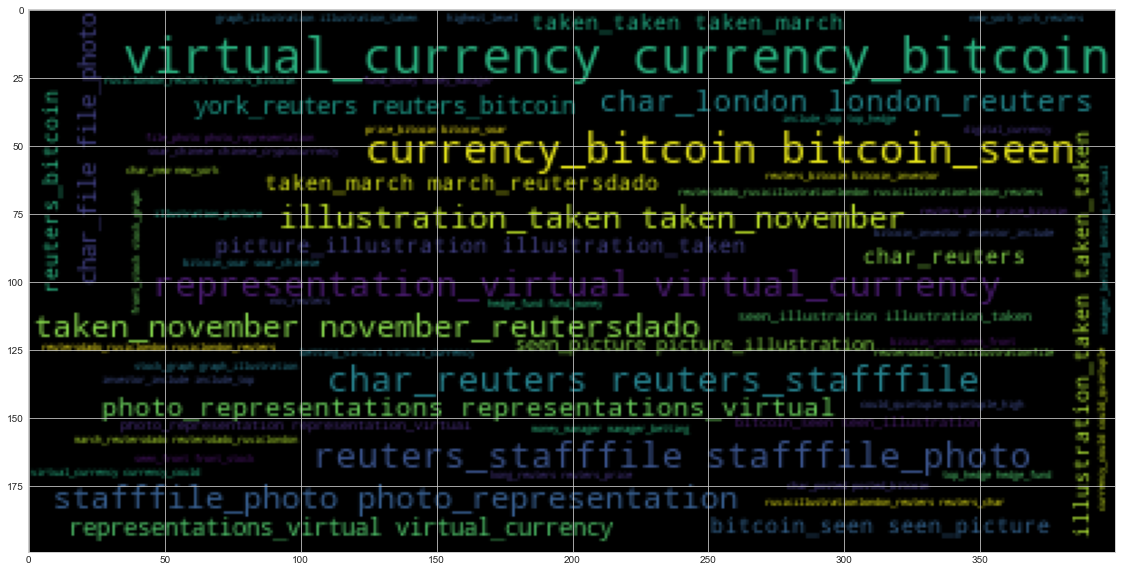

In [29]:
# Generate the Bitcoin word cloud
big_string = ' '.join(btc_df['text'])
input_text = process_text(big_string)
wc = WordCloud().generate(input_text)
plt.imshow(wc)

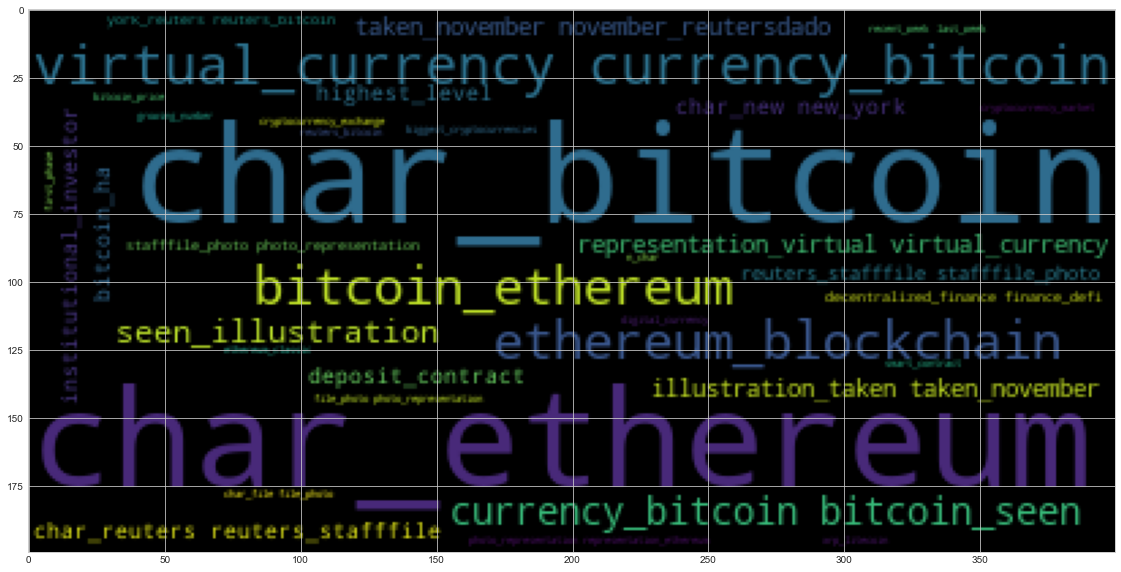

In [30]:
# Generate the Ethereum word cloud
big_string = ' '.join(etc_df['text'])
input_text = process_text(big_string)
wc = WordCloud().generate(input_text)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [31]:
import spacy
from nltk.corpus import reuters
from spacy import displacy

In [32]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [33]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [43]:
# Concatenate all of the bitcoin text together
bitcoin_all = ' '.join(btc_df['text'])
bitcoin_all

n, everyones favorite decentralized digital currency based on hype, lies, and general mal… [+2490 chars] Six years after the launch of the Mexico-based crypotcurrency exchange and financial services platform Bitso the company revealed it has closed on $62 million in financing to capitalize on the crypto… [+4328 chars] Decentralized exchange protocols that allow crypto traders and investors to trade across different blockhains have been in development for a while. A significant new development now comes with the la… [+3079 chars] 4. U.S. markets ended November with large gains. \r\nEven with a small decline today, the S&amp;P 500 jumped by 10.8 percent in November, its best monthly showing since April and the fourth-best month … [+535 chars] Maisie Williams also known as Arya Stark, daughter of Lady Catelyn and Lord Eddard, acolyte of the Faceless Men, you know the one is considering buying some bitcoins.\xa0\r\nOn Monday, she asked her Twitt… [+1512 chars] 1 with 1 posters participatin

In [55]:
# Run the NER processor on all of the text
btc_ner = nlp(bitcoin_all)

# Add a title to the document
btc_ner.user_data['title']='Bitcoin NER'

In [56]:
# Render the visualization
displacy.render(btc_ner, style='ent')

In [52]:
# List all entities 
for ent in btc_ner.ents:
    print (ent.text, ent.label_)

Microsoft ORG
Ukraine GPE
nine years DATE
more than $10 million MONEY
Microsoft ORG
2016 to 2018 DATE
Visa ORG
first ORDINAL
Bitcoin GPE
PayPal PRODUCT
US GPE
first ORDINAL
US GPE
October DATE
November 2017 DATE
two-month DATE
Bitcoin GPE
10,000 MONEY
first ORDINAL
the next 20 days DATE
19,665 MONEY
digital yuan ORG
the People’s Bank of China ORG
the past few weeks DATE
bitcoin GPE
digital ORG
hype GPE
Six years DATE
Mexico GPE
$62 million MONEY
Decentralized GPE
4 CARDINAL
U.S. GPE
November DATE
today DATE
500 CARDINAL
10.8 percent PERCENT
November DATE
monthly DATE
April DATE
fourth ORDINAL
Maisie Williams PERSON
Arya Stark PERSON
Lady Catelyn PERSON
Eddard PERSON
acolyte PERSON
the Faceless Men WORK_OF_ART
Monday DATE
1 CARDINAL
1 CARDINAL
Microsoft ORG
Ukraine GPE
nine years DATE
more than $10 million MONEY
Microsoft ORG
8 CARDINAL
7 CARDINAL
Bitcoin GPE
above $18,000 MONEY
Tuesday DATE
evening TIME
December 2017 DATE
this week DATE
more than $18,000 MONEY
Bitcoin GPE
March 13, 202

---

## Ethereum NER

In [53]:
# Concatenate all of the bitcoin text together
ethereum_all = ' '.join(etc_df['text'])
ethereum_all

ctors assets under manag… [+1888 chars] NEW YORK (Reuters) - Institutional investors pumped $429 million into cryptocurrency funds and products for the week ended Dec. 7, the second highest on record, pushing the sectors assets under manag… [+1888 chars] PayPal has launched the Generosity Network, a platform that allows users to create customized, personal fundraising campaigns. Yes, just like you can on GoFundMe.\xa0\r\nYou can raise a maximum of $20,000… [+1601 chars] By Reuters Staff\r\nFILE PHOTO: A representation of virtual currency Bitcoin is seen in front of a stock graph in this illustration taken November 19, 2020. REUTERS/Dado Ruvic/Illustration/File photo\r\n… [+336 chars] By Reuters Staff\r\nFILE PHOTO: A representation of virtual currency Bitcoin is seen in front of a stock graph in this illustration taken November 19, 2020. REUTERS/Dado Ruvic/Illustration/File photo\r\n… [+336 chars] The New York Times is (probably) about to publish a story about cryptocurrency exchange C

In [57]:
# Run the NER processor on all of the text
etc_ner = nlp(ethereum_all)

# Add a title to the document
etc_ner.user_data['title']='Ethereum NER'

In [58]:
# Render the visualization
displacy.render(etc_ner, style='ent')

In [59]:
# List all Entities
for ent in etc_ner.ents:
    print (ent.text, ent.label_)

PayPal PRODUCT
US GPE
first ORDINAL
US GPE
October DATE
February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
LONDON GPE
Reuters ORG
XRP ORG
Monday DATE
NEW YORK PERSON
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
NEW YORK PERSON
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
PayPal PERSON
the Generosity Network ORG
20,000 MONEY
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
The New York Times ORG
Coinbase ORG
early February this year DATE
last month DATE
October DATE
$24 million MONEY
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
U.S. GPE
May 26, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
LONDON GPE
Reuters ORG
Bitcoin GPE
Hala Systems ORG
Hedera ORG